In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar
import highlight_text
from functools import reduce

In [17]:
Player_ID_1 = 'Christian Luyindama_Galatasaray_2020-2021'
Player_1 = str(Player_ID_1).split('_',2)[0]
Team_1 = str(Player_ID_1.split('_',2)[1])
Season_1 = str(Player_ID_1.split('_',2)[2])

Player_ID_2 = 'Ryan Donk_Galatasaray_2020-2021'
Player_2 = str(Player_ID_2).split('_',2)[0]
Team_2 = str(Player_ID_2.split('_',2)[1])
Season_2 = str(Player_ID_2.split('_',2)[2])

Color_1 = 'red'
Color_2 = 'yellow'

myfont = {'fontname':'DejaVu Sans'}

In [18]:
filenames = ['LuyDonk.xlsx']

In [19]:
dataframe_list = [pd.read_excel(file_name) for file_name in filenames]

In [20]:
df0 = dataframe_list[0]
df = df0

In [21]:
df = df.drop(['Drb.1'],axis =1)
df = df.drop(['SpG.1'],axis =1)
df = df.drop(['KeyP.1'],axis =1)
df = df.drop(['PS%.1'],axis =1)
df.columns = ['Player', 'Season', 'Team', 'Competition', 'Appearances', 'Minutes', 'Goals',
       'Assists', 'Yellow Cards', 'Red Cards', 'Shots per Game', 'Pass Completion %', 'Aerials Won', 
       'Tackles', 'Interceptions', 'Fouls Committed', 'Offsides', 'Clearances', 'Dribbles', 'Blocks', 'Own Goals', 
       'Key Passes', 'Fouls Won','Offsides', 'Dispossessed', 'Unsuccessful Touches', 'Passes Attempted', 'Crosses', 'Long Balls', 'Through Balls']
df
df['Player_ID'] = df['Player'].astype(str) + '_' + df['Team'].astype(str) + '_' + df['Season'].astype(str)
df

,Player,Season,Team,Competition,Appearances,Minutes,Goals,Assists,Yellow Cards,Red Cards,...,Key Passes,Fouls Won,Offsides,Dispossessed,Unsuccessful Touches,Passes Attempted,Crosses,Long Balls,Through Balls,Player_ID
0,Christian Luyindama,2020-2021,Galatasaray,TS,15(4),1385,-,1,3,-,...,0.3,0.3,-,0.5,0.8,45.6,-,3.9,0.1,Christian Luyindama_Galatasaray_2020-2021
1,Christian Luyindama,2019-2020,Galatasaray,TS,10,885,-,-,1,-,...,0.1,0.2,-,0.5,0.9,51.4,-,3.1,-,Christian Luyindama_Galatasaray_2019-2020
2,Christian Luyindama,2018-2019,Galatasaray,TS,11,990,-,1,4,-,...,0.2,1.0,0.1,0.5,1.1,57.0,-,3.3,-,Christian Luyindama_Galatasaray_2018-2019
3,Ryan Donk,2020-2021,Galatasaray,TS,16(8),1481,2,3,2,-,...,0.2,0.8,-,0.1,0.4,45.2,-,3.1,0.1,Ryan Donk_Galatasaray_2020-2021
4,Ryan Donk,2019-2020,Galatasaray,TS,23(3),2132,3,1,6,-,...,0.2,0.6,-,0.4,0.5,52.1,0.2,2.8,-,Ryan Donk_Galatasaray_2019-2020


In [22]:
df = df[['Player_ID', 'Pass Completion %','Aerials Won','Tackles','Interceptions','Clearances', 'Dribbles','Blocks', 'Dispossessed', 'Unsuccessful Touches','Passes Attempted', 'Long Balls' ]]

In [23]:
df = df[(df['Player_ID']==Player_ID_1) | (df['Player_ID']==Player_ID_2)].reset_index(drop=True)

In [24]:
params = list(df.columns)
params = params[1:]

In [25]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    #a = 0
    
    b = max(df[params][x])
    b = b + (b*.10)
    
    ranges.append((a,b))
    
for x in range(len(df['Player_ID'])):
    if df['Player_ID'][x] == Player_ID_1:
        a_values = df.iloc[x].values.tolist()
    if df['Player_ID'][x] == Player_ID_2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [26]:
title = dict(
    title_name= Player_1,
    title_color = Color_1,
    subtitle_name = str(Team_1) + ' ' + str(Season_1) ,
    subtitle_color = Color_1,
    title_name_2= Player_2,
    title_color_2 = Color_2,
    subtitle_name_2 = str(Team_2) + ' ' + str(Season_2),
    subtitle_color_2 = Color_2,
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@msuatgunerli - all stats per90, data via FBref'

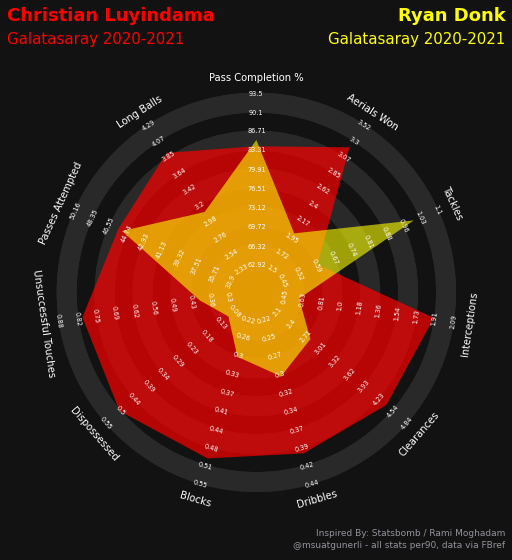

In [27]:
radar = Radar(background_color="#121212", patch_color="#292929", label_color="#FFFFFF", range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=[Color_1,Color_2],
                         alphas=[0.7,0.6],title=title,endnote=endnote,
                         compare=True)

In [28]:
'''labels = []
max = []

for i in range(len(params)):
    label = f'{params[i]}'
    labels.append(label)'''

"labels = []\nmax = []\n\nfor i in range(len(params)):\n    label = f'{params[i]}'\n    labels.append(label)"

In [29]:
'''Player_1 = df.iloc[0]
Player_1 = Player_1[1:]

Player_2 = df.iloc[1]
Player_2 = Player_2[1:]'''

'Player_1 = df.iloc[0]\nPlayer_1 = Player_1[1:]\n\nPlayer_2 = df.iloc[1]\nPlayer_2 = Player_2[1:]'

In [30]:
'''#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5,7.89))

fig.set_facecolor('#121212')
ax.set_facecolor('#121212')

spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

y = labels
y_pos = np.arange(len(labels))
width = 0.25

plt.axvline(0,linewidth=2, color='white', alpha = 1, zorder = 2)

rects1 = ax.barh(y_pos - width/2, Player_1, width, color = Color_1, alpha = 0.95, zorder = 2)
#for index, value in enumerate(PPR_1):
    #plt.text(1, index + 3*width/4, str(round(df[params[index]][0],2)), fontweight='bold', #color='white', zorder = 3)

rects2 = ax.barh(y_pos + width/2, Player_2, width, color = Color_2, alpha = 0.95, zorder = 2)
#for index, value in enumerate(PPR_2):
#    plt.text(1, index - width/4, str(round(df[params[index]][1],2)), fontweight='bold', color='white', zorder = 3)

ax.tick_params(axis=u'both', which=u'both',length=0)

#plt.xlim([0, 100])
#plt.xticks([0,25,50,75,100], fontweight='bold',color='white')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels,fontweight='bold', size = 10, color='white')
ax.invert_yaxis()
ax.set_xlabel('Player Percentile Rank', fontweight='bold', size = 10, color = 'white')

fig.tight_layout()

plt.show()'''

"#plt.rcdefaults()\nfig, ax = plt.subplots(figsize=(5,7.89))\n\nfig.set_facecolor('#121212')\nax.set_facecolor('#121212')\n\nspines = ['top','bottom','left','right']\nfor x in spines:\n    if x in spines:\n        ax.spines[x].set_visible(False)\n\ny = labels\ny_pos = np.arange(len(labels))\nwidth = 0.25\n\nplt.axvline(0,linewidth=2, color='white', alpha = 1, zorder = 2)\n\nrects1 = ax.barh(y_pos - width/2, Player_1, width, color = Color_1, alpha = 0.95, zorder = 2)\n#for index, value in enumerate(PPR_1):\n    #plt.text(1, index + 3*width/4, str(round(df[params[index]][0],2)), fontweight='bold', #color='white', zorder = 3)\n\nrects2 = ax.barh(y_pos + width/2, Player_2, width, color = Color_2, alpha = 0.95, zorder = 2)\n#for index, value in enumerate(PPR_2):\n#    plt.text(1, index - width/4, str(round(df[params[index]][1],2)), fontweight='bold', color='white', zorder = 3)\n\nax.tick_params(axis=u'both', which=u'both',length=0)\n\n#plt.xlim([0, 100])\n#plt.xticks([0,25,50,75,100], fontw